# Øving 8

In [55]:
%matplotlib inline

from numpy import *
from matplotlib.pyplot import *
from math import factorial, atan
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [2]:
def divdiff(xdata,ydata):
    # Create the table of divided differences based
    # on the data in the arrays x_data and y_data. 
    n = len(xdata)
    F = zeros((n,n))
    F[:,0] = ydata
    for j in range(n):
        for i in range(n-j-1):
            F[i,j+1] = (F[i+1,j]-F[i,j])/(xdata[i+j+1]-xdata[i])
    return F


def newton_interpolation(F, xdata, x):
    # The Newton interpolation polynomial evaluated in x. 
    n, m = shape(F)
    xpoly = ones(len(x))
    newton_poly = F[0,0]*ones(len(x))
    for j in range(n-1):
        xpoly = xpoly*(x-xdata[j])
        newton_poly = newton_poly + F[0,j+1]*xpoly
    return newton_poly

### Oppgave 1 d)

n =  2: x = 1.74129, error: -9.24e-03
n =  4: x = 1.73270, error: -6.54e-04
n =  8: x = 1.73206, error: -6.12e-06
n = 16: x = 1.73205, error:  8.21e-07


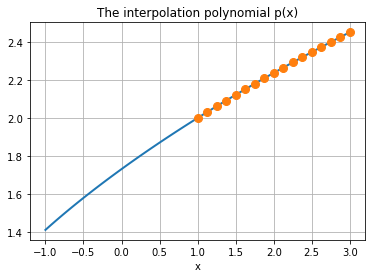

In [3]:
def f(x):
    return sqrt(x + 3)

n = 2
while n <= 16:
    xdata = linspace(1, 3, n + 1)
    ydata = [f(x) for x in xdata]

    F = divdiff(xdata, ydata)

    x = [0]
    p = newton_interpolation(F, xdata, x)

    print(f'n = {f"{n}".rjust(2)}: x = {p[0]:.5f}, error: {str(f"{sqrt(3) - p[0]:.2e}").rjust(9)}')
    
    n *= 2
    
x = linspace(-1, 3, 101)

F = divdiff(xdata, ydata)
p = newton_interpolation(F, xdata, x)

plot(x, p)
plot(xdata, ydata, 'o')
title('The interpolation polynomial p(x)')
grid(True)
xlabel('x');

### Oppgave 3 c)

In [4]:
def simpson(f, a, b, m=10):
    n = 2*m
    x_noder = linspace(a, b, n+1)   
    h = (b-a)/n                         
    S1 = f(x_noder[0]) + f(x_noder[n])  
    S2 = sum(f(x_noder[1:n:2]))         
    S3 = sum(f(x_noder[2:n-1:2]))       
    S = h*(S1 + 4*S2 + 2*S3)/3
    return S

In [5]:
def f(x):
    return exp(-x)

a, b = 1, 3
m = 22

i = exp(-1) - exp(-3)
s = simpson(f, a, b, m=m)

print(f'Estimate: {s}, actual: {i}, error: {i - s:.2e}')

Estimate: 0.3180923803455209, actual: 0.3180923728035784, error: -7.54e-09


Forskjellen mellom estimatet med bruk av 22 delintervaller gir en feil i størrelsesorden 10 i minus niende, altså noe bedre enn kravet på 10 i minus åttende, så det er smud.

### Oppgave 4 f)

In [42]:
def gauss(f, a, b):
    c = (a + b) / 2
    h = (a - b) / 2
    return h * (5 * f(-sqrt(3 / 5) * h + c) \
                + 8 * f(c) \
                + 5 * f(sqrt(3 / 5) * h + c)) / 9

def gauss_basic(f, a, b):
    
    # Gauss med ett intervall
    S1 = gauss(f, a, b)
    
    # Finner midten av intervallet
    c = (a + b) / 2
    
    # Tar Gauss av begge halvdeler og legger sammen
    S2 = gauss(f, a, c) + gauss(f, c, b)

    # Finner og returnerer 
    error_estimate = (S2 - S1) / 63
    
    return S2, error_estimate

# Polynomet til bestemmelse av presisjonsgrad
def f(n=1):
    def g(x):
        return x ** n
    return g
    
for n in range(0, 7):
    s2, error = gauss_basic(f(n), -1, 1)
    print(f'n={n}: value={f"{s2:.4f}".rjust(8)}, error={f"{error:.2e}".rjust(9)}')

n=0: value= -2.0000, error= 0.00e+00
n=1: value=  0.0000, error= 0.00e+00
n=2: value= -0.6667, error= 1.76e-18
n=3: value=  0.0000, error= 0.00e+00
n=4: value= -0.4000, error= 8.81e-19
n=5: value=  0.0000, error= 0.00e+00
n=6: value= -0.2850, error=-7.14e-04


### Oppgave 4 g)

In [59]:
def gauss_adaptive(f, a, b, tol=1.e-6, level=0, max_level=15, silent=False):
    
    Q, error_estimate = gauss_basic(f, a, b)
    
    if not silent:
        # -------------------------------------------------
        if level == 0:
            print(' l   a           b         feil_est   tol')
            print('==============================================') 
        print('{:2d}   {:.6f}   {:.6f}   {:.2e}   {:.2e}'.format(
                level, a, b, abs(error_estimate), tol))

        x = linspace(a, b, 101)
        plot(x, f(x), [a, b], [f(a), f(b)], '.r')
        title('The integrand and the subintervals')
        # -------------------------------------------------

    if level >= max_level:
        print('Warning: Maximum number of levels used.')
        return Q
    
    if abs(error_estimate) < tol:         # Accept the result, and return
        result = Q + error_estimate      
    else:
        # Divide the interval in two, and apply the algorithm to each interval.
        c = 0.5*(b+a)
        result_left  = gauss_adaptive(f, a, c, tol = 0.5*tol, level = level+1)
        result_right = gauss_adaptive(f, c, b, tol = 0.5*tol, level = level+1)
        result = result_right + result_left
    return result


Function 1:

With tolerance 0.001:


Numerical solution = -0.040456, exact solution = 0.384889
Tolerance = 1.0e-03, error = 3.585e-01

With tolerance 1e-06:

 1   1.000000   2.000000   8.25e-08   5.00e-07
 1   2.000000   3.000000   1.53e-09   5.00e-07

Numerical solution = -0.040459, exact solution = 0.384889
Tolerance = 1.0e-06, error = 3.586e-01

With tolerance 1e-09:

 1   1.000000   2.000000   8.25e-08   5.00e-10
 2   1.000000   1.500000   2.08e-09   2.50e-10
 3   1.000000   1.250000   3.21e-11   1.25e-10
 3   1.250000   1.500000   7.89e-12   1.25e-10
 2   1.500000   2.000000   1.76e-10   2.50e-10
 1   2.000000   3.000000   1.53e-09   5.00e-10
 2   2.000000   2.500000   2.56e-11   2.50e-10
 2   2.500000   3.000000   5.37e-12   2.50e-10

Numerical solution = -0.040459, exact solution = 0.384889
Tolerance = 1.0e-09, error = 3.586e-01


Function 2:

With tolerance 0.001:

 1   0.000000   2.500000   3.82e-04   5.00e-04
 1   2.500000   5.000000   4.56e-08   5.00e-04

Numerical solution

 7   0.359375   0.375000   1.88e-11   7.81e-12
 8   0.359375   0.367188   2.11e-13   3.91e-12
 8   0.367188   0.375000   8.95e-14   3.91e-12
 4   0.375000   0.500000   6.84e-06   6.25e-11
 5   0.375000   0.437500   1.18e-07   3.13e-11
 6   0.375000   0.406250   8.10e-10   1.56e-11
 7   0.375000   0.390625   2.51e-12   7.81e-12
 7   0.390625   0.406250   7.86e-12   7.81e-12
 8   0.390625   0.398438   5.88e-14   3.91e-12
 8   0.398438   0.406250   6.14e-14   3.91e-12
 6   0.406250   0.437500   6.69e-10   1.56e-11
 7   0.406250   0.421875   6.50e-12   7.81e-12
 7   0.421875   0.437500   4.00e-12   7.81e-12
 5   0.437500   0.500000   1.13e-08   3.13e-11
 6   0.437500   0.468750   1.90e-10   1.56e-11
 7   0.437500   0.453125   2.11e-12   7.81e-12
 7   0.453125   0.468750   9.90e-13   7.81e-12
 6   0.468750   0.500000   3.09e-11   1.56e-11
 7   0.468750   0.484375   4.04e-13   7.81e-12
 7   0.484375   0.500000   1.23e-13   7.81e-12
 2   0.500000   1.000000   1.89e-03   2.50e-10
 3   0.500000

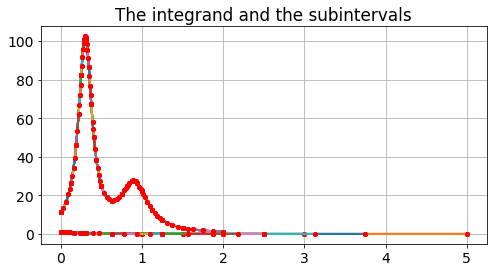

In [66]:
def f1(x):
    return 1 / (1 + (4 * x) ** 2)

def f2(x):
    return 1 / (1 + 16 * x ** 2)

def f3(x):
    return 1 / ((x - 0.3) ** 2 + 0.01) + 1 / ((x - 0.9) ** 2 + 0.04)

testcases = [
    {
        "a": 1,
        "b": 3,
        "f": f1,
        "exact": exp(-1) - exp(-3),
    },
    {
        "a": 0,
        "b": 5,
        "f": f2,
        "exact": atan(20) / 4,
    },
    {
        "a": 0,
        "b": 2,
        "f": f3,
        "exact": 41.326213804391148551,
    },
]

tolerances = [1.e-3, 1.e-6, 1.e-9]

for i, case in enumerate(testcases, start=1):
    print(f'\nFunction {i}:\n')
    for tol in tolerances:
        
        print(f'With tolerance {tol}:\n')

        result = gauss_adaptive(case['f'], case['a'], case['b'], tol=tol, silent=True)

        print(f'\nNumerical solution = {result:8f}, exact solution = {I_exact:8f}')

        err = case['exact'] - result
        print(f'Tolerance = {tol:.1e}, error = {abs(err):.3e}\n')